In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
life_data = pd.read_csv('../input/life-expectancy-who/Life Expectancy Data.csv')

In [3]:
life_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
status = pd.get_dummies(life_data.Status)

In [5]:
life_data = pd.concat([life_data, status], axis = 1)

In [6]:
life_data = life_data.drop(['Status'], axis=1)

In [7]:
life_data = life_data.drop(['Developed'], axis=1)

In [8]:
life_data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [9]:
life_data = life_data.drop(['Country'], axis=1)

In [10]:
life_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


Text(0, 0.5, 'Life expectancy')

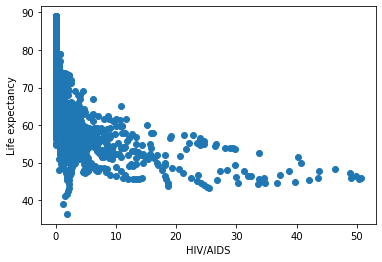

In [11]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

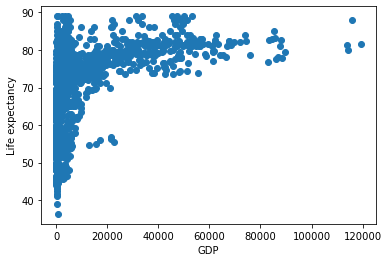

In [12]:
plt.scatter(life_data.GDP, life_data['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

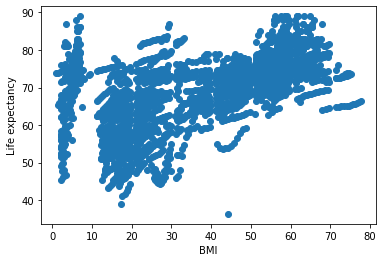

In [13]:
plt.scatter(life_data[' BMI '], life_data['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

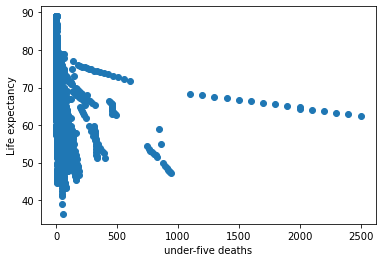

In [14]:
plt.scatter(life_data['under-five deaths '], life_data['Life expectancy '])
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

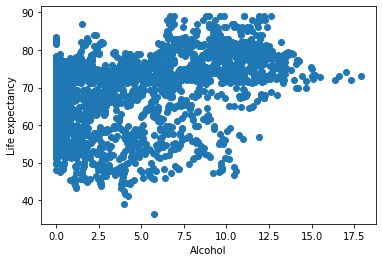

In [15]:
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

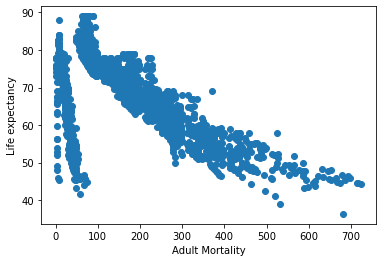

In [16]:
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

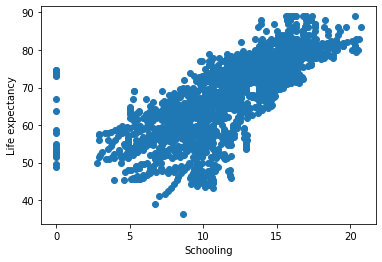

In [17]:
plt.scatter(life_data['Schooling'], life_data['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

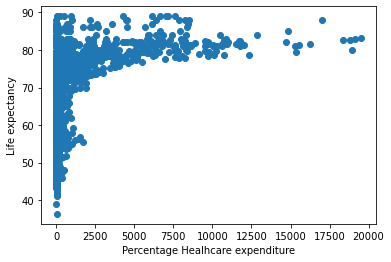

In [18]:
plt.scatter(life_data['percentage expenditure'], life_data['Life expectancy '])
plt.xlabel('Percentage Healhcare expenditure')
plt.ylabel('Life expectancy')

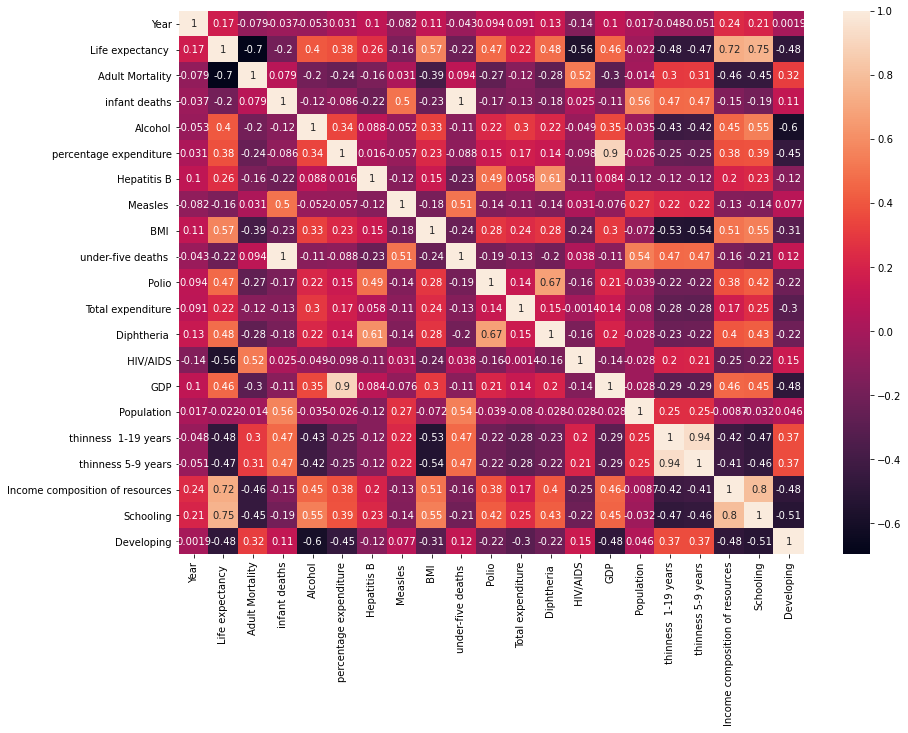

In [19]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)

In [20]:
life_data.isnull().head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
life_data.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developing                           0
dtype: int64

In [22]:
life_data.fillna(value = life_data.mean(), inplace = True)

In [23]:
life_data.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Developing                         0
dtype: int64

In [24]:
life_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [25]:
life_data.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developing'],
      dtype='object')

In [26]:
X=life_data.drop(['Life expectancy '],axis='columns')
Y=pd.DataFrame(data=life_data,columns=['Life expectancy '])

In [27]:
Y.head()

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= 42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:

lr= LinearRegression(fit_intercept=True, normalize=True).fit(X_train, Y_train)
predicted= lr.predict(X_test)
len(predicted)

882

In [32]:
lr.score(X_train, Y_train)

0.8179303664708197

In [33]:
r2_score(predicted, Y_test)

0.7767364873333029

In [34]:
mean_squared_error(predicted, Y_test)

16.70951545393297

In [35]:
mean_absolute_error(predicted, Y_test)

2.9741112222422537